In [2]:
import pandas as pd

In [4]:
filepath=r"C:\Users\86138\Desktop\实验8 数据\实验8 数据\木材剩余物.csv"
df=pd.read_csv(filepath,sep=",",index_col=0)
columns=["剩余物","采伐量"]
df.columns=columns
df.head()

,剩余物,采伐量
林业局名,,
乌伊岭,26.13,61.4
东风,23.49,48.3
新青,21.97,51.8
红星,11.53,35.9
五营,7.18,17.8


In [5]:
X=df[["采伐量"]]
Y=df["剩余物"]
X.head()

,采伐量
林业局名,
乌伊岭,61.4
东风,48.3
新青,51.8
红星,35.9
五营,17.8


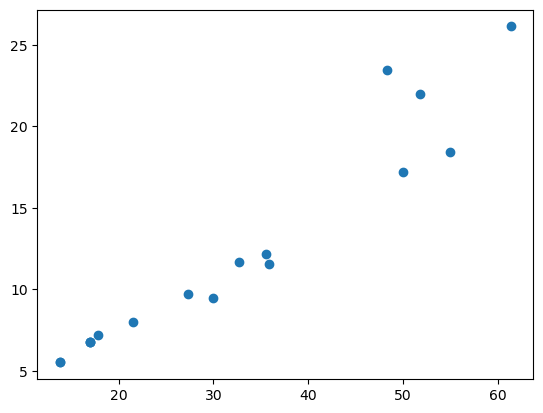

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [7]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit (X, Y)
regr.coef_,regr.intercept_

(array([0.40112042]), -0.6200896594119296)

In [10]:
regr.predict([[20]])

C:\Python\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.4023187])

In [11]:
import statsmodels.api as sm
X2=sm.add_constant(X)
est=sm.OLS(Y,X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    剩余物   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.48e-09
Time:                        22:27:19   Log-Likelihood:                -34.623
No. Observations:                  17   AIC:                             73.25
Df Residuals:                      15   BIC:                             74.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6201      1.102     -0.563      0.5

C:\Python\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
X2

,const,采伐量
林业局名,,
乌伊岭,1.0,61.4
东风,1.0,48.3
新青,1.0,51.8
红星,1.0,35.9
五营,1.0,17.8
上甘岭,1.0,17.0
友好,1.0,55.0
翠峦,1.0,32.7
乌马河,1.0,17.0


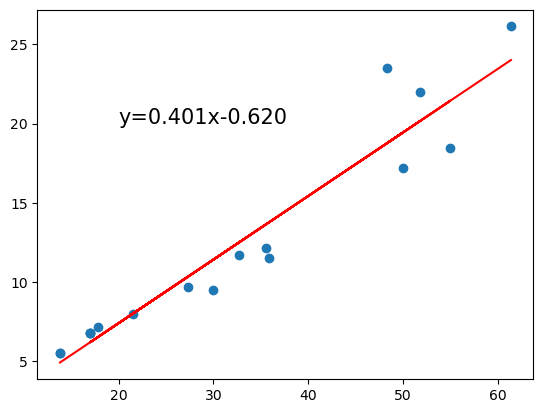

In [14]:
plt.scatter(X,Y)
plt.plot(X, regr.predict(X),color='r')
plt.text(20,20,"y={:.3f}x{:+.3f}" .format(regr.coef_[0],regr.intercept_), fontsize=15)
plt.show()

In [15]:
df["预测剩余物"]=regr.predict(X)
df["误差"]=df["预测剩余物"]-df["剩余物"]
df

,剩余物,采伐量,预测剩余物,误差
林业局名,,,,
乌伊岭,26.13,61.4,24.008704,-2.121296
东风,23.49,48.3,18.754027,-4.735973
新青,21.97,51.8,20.157948,-1.812052
红星,11.53,35.9,13.780133,2.250133
五营,7.18,17.8,6.519854,-0.660146
上甘岭,6.80,17.0,6.198957,-0.601043
友好,18.43,55.0,21.441533,3.011533
翠峦,11.69,32.7,12.496548,0.806548
乌马河,6.80,17.0,6.198957,-0.601043


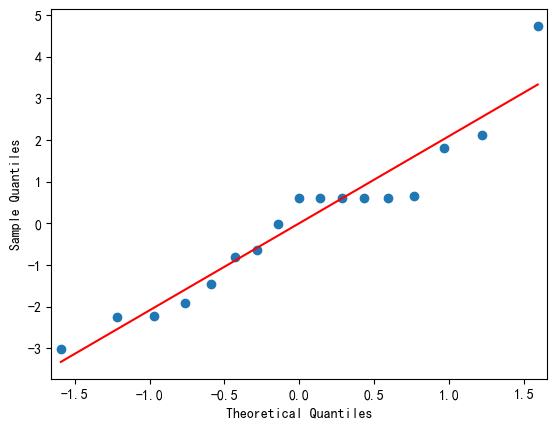

In [16]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
sm.qqplot(est.resid,line='r')
plt.show()

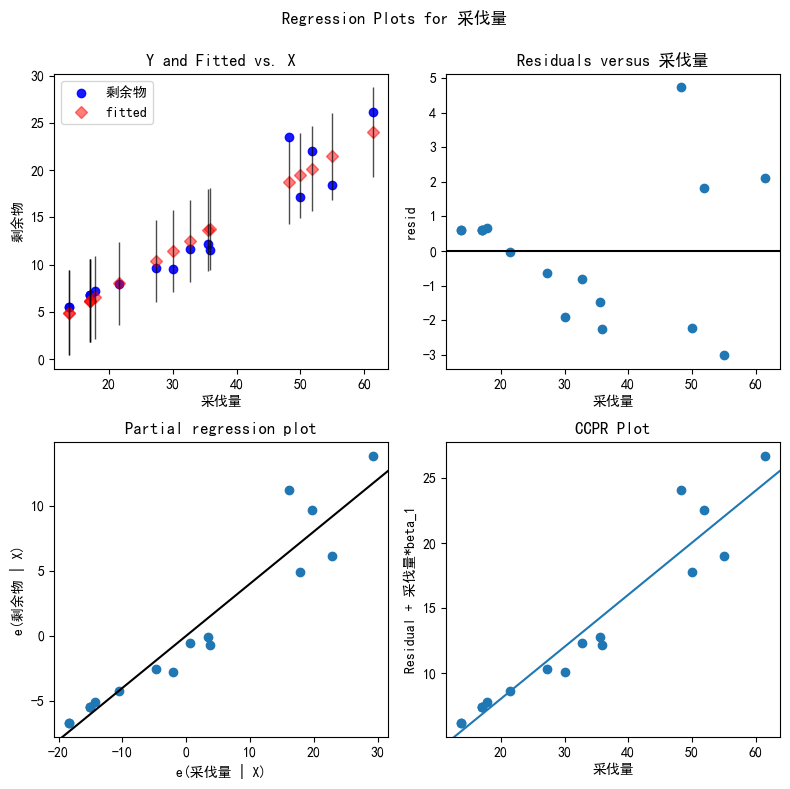

In [23]:
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(est,"采伐量",fig=fig)

In [24]:
est=sm.OLS(Y,X).fit()
est.summary()

C:\Python\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    剩余物   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              860.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                    2.45e-15
Time:                        22:29:58   Log-Likelihood:                         -34.801
No. Observations:                  17   AIC:                                      71.60
Df Residuals:                      16   BIC:                                      72.43
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
采伐量            0.3855      0.013     29.325      0.000       0.358       0.413
==============================================================================
Omnibus:                        5.415   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.904
Skew:                           0.930   Prob(JB):                        0.234
Kurtosis:                       3.800   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
est.predict(20)

NameError: name 'est' is not defined

In [1]:
y_pred=est.predict(20)
plt.scatter(X,Y)
plt.plot(X,y_pred,color='green')
for i in df.index:
    p1t.plot([df.loc[i,"采伐量"],df.loc[i,"采伐量"]],[df.loc[i,"剩余物"],df.loc[i,"预测剩余物"]],color='r ')
plt.text(20, 20,"y={:.3f}x".format(0.3855),fontsize=15)
plt.scatter(20,yp,marker='*',color="blue",s=300)
plt.text(18,10,s="{:.3f}".format(yp[0]),fontsize=12)
plt.xlim(10,70)
plt.ylim(0,30)
plt.xlabel("采伐量")
plt.ylabel("木材剩余物")
plt.show()

NameError: name 'est' is not defined

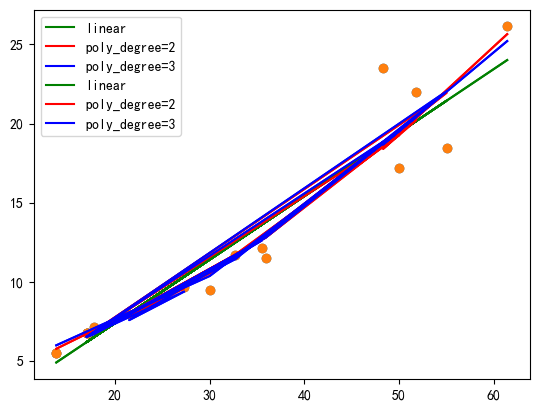

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #二次项模型
Xpoly=poly.fit_transform(X)
poly3=PolynomialFeatures(degree=3)#三次项模型
Xpoly3=poly3.fit_transform(X)
poly_reg2=sm.OLS(endog=Y,exog=Xpoly).fit()  #一元二次多项式回归
Y_pre2=poly_reg2.predict(Xpoly)
poly_reg3=sm.OLS(endog=Y,exog=Xpoly3).fit()#一元三次多项式回归
Y_pre3=poly_reg3.predict(Xpoly3)
plt.scatter(X,Y)
plt.plot(X,regr.predict(X),color='green',label="linear")
plt.plot(X,Y_pre2,color="r",label="poly_degree=2")
plt.plot(X,Y_pre3,color="b",label="poly_degree=3")
plt.legend( )
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #二次项模型
Xpoly=poly.fit_transform(X)
poly3=PolynomialFeatures(degree=3)#三次项模型
Xpoly3=poly3.fit_transform(X)
poly_reg2=sm.OLS(endog=Y,exog=Xpoly).fit()  #一元二次多项式回归
Y_pre2=poly_reg2.predict(Xpoly)
poly_reg3=sm.OLS(endog=Y,exog=Xpoly3).fit()#一元三次多项式回归
Y_pre3=poly_reg3.predict(Xpoly3)
plt.scatter(X,Y)
plt.plot(X,regr.predict(X),color='green',label="linear")
plt.plot(X,Y_pre2,color="r",label="poly_degree=2")
plt.plot(X,Y_pre3,color="b",label="poly_degree=3")
plt.legend( )


In [35]:
poly_reg2.summary()

C:\Python\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    剩余物   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     94.54
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           7.40e-09
Time:                        22:36:27   Log-Likelihood:                -33.166
No. Observations:                  17   AIC:                             72.33
Df Residuals:                      14   BIC:                             74.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3473      2.666      1.255      0.230      -2.371       9.066
x1             0.1223      0.175      0.699      0.496      -0.253       0.497
x2             0.0039      0.002      1.618      0.128      -0.001       0.009
==============================================================================
Omnibus:                       10.557   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.928
Skew:                           0.975   Prob(JB):                       0.0115
Kurtosis:                       5.967   Cond. No.                     9.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
poly_reg3.summary()

C:\Python\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    剩余物   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     59.32
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           7.66e-08
Time:                        22:36:30   Log-Likelihood:                -33.060
No. Observations:                  17   AIC:                             74.12
Df Residuals:                      13   BIC:                             77.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0820      7.312      0.832      0.421      -9.716      21.880
x1            -0.1666      0.738     -0.226      0.825      -1.761       1.428
x2             0.0127      0.022      0.579      0.572      -0.035       0.060
x3         -8.082e-05      0.000     -0.404      0.693      -0.001       0.000
==============================================================================
Omnibus:                        7.382   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.203
Skew:                           0.658   Prob(JB):                       0.0742
Kurtosis:                       5.370   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv(r"C:\Users\86138\Desktop\实验8 数据\实验8 数据\Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
x=df.iloc[:,:-1]
Y=df["sales"]

In [41]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


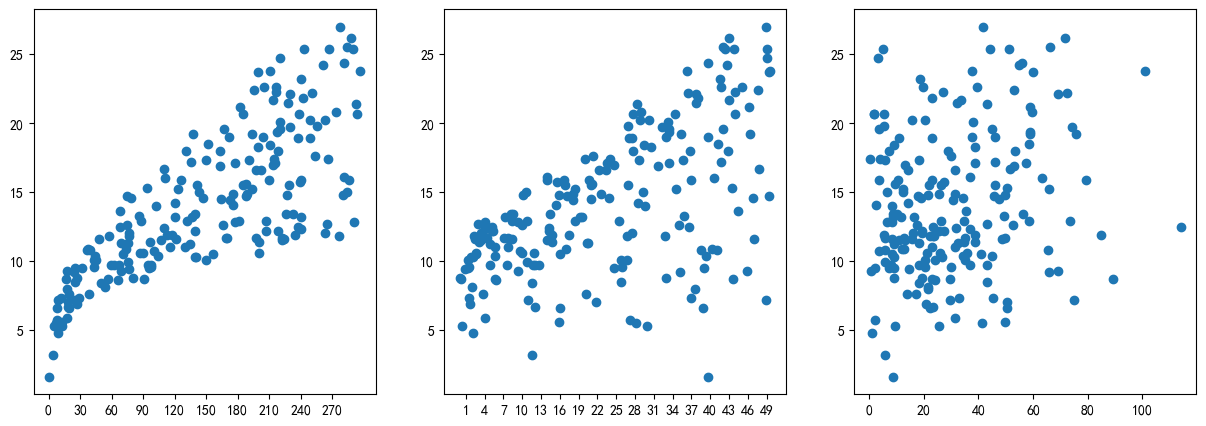

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x["TV"],Y)
plt.xticks(np.arange(0,300,30))
plt.subplot(1,3,2)
plt.scatter(x["radio"],Y)
plt.xticks(np.arange(1,50,3))
plt.subplot(1,3,3)
plt.scatter(x["newspaper"],Y)
plt.show()

In [56]:
import statsmodels.api as sm
X2=sm.add_constant(x)
est=sm.OLS(Y,X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        22:51:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

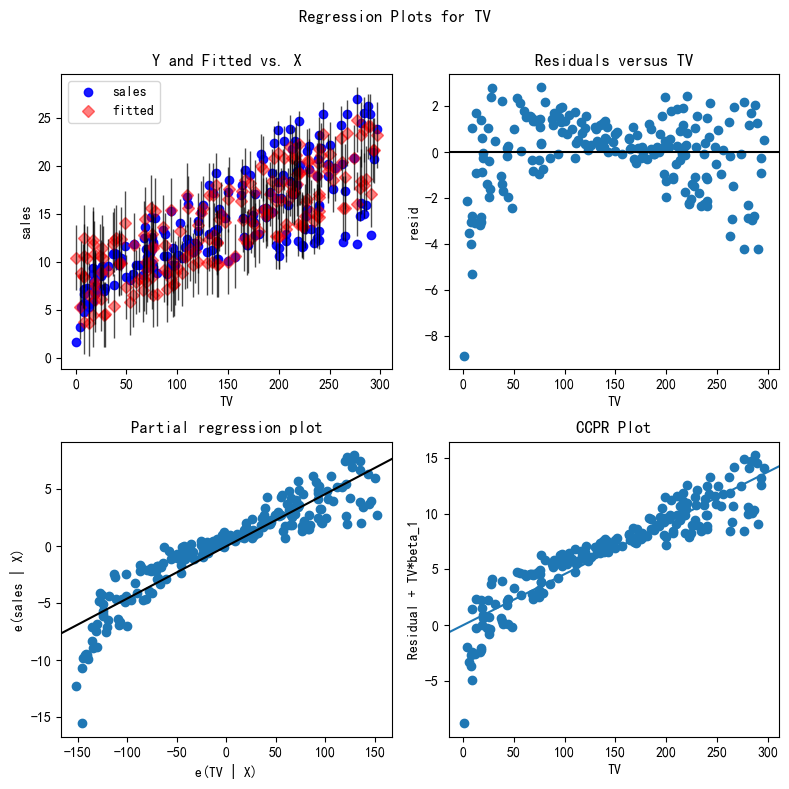

In [58]:
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(est,"TV",fig=fig)

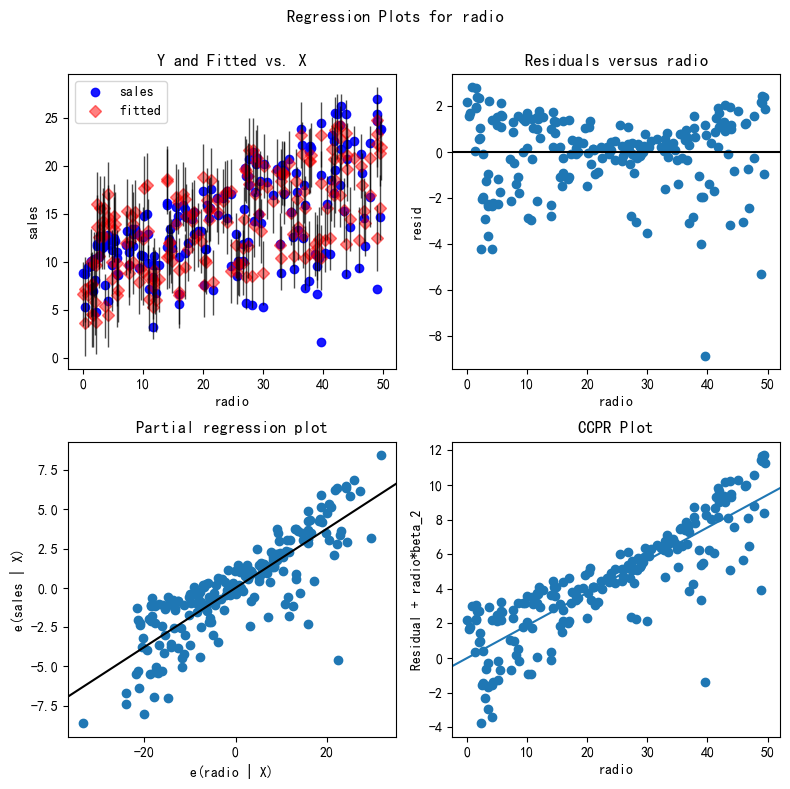

In [60]:
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(est,"radio",fig=fig)

In [1]:
a=input()
b=int(a[-1::-1])
print(b)
